# Question
train an SVM regressor on the California housing dataset.

# Problem Definitions
predicte price of the california housing with SVR

In [1]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
X = housing["data"]
y = housing["target"]

In [2]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [3]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [4]:
from sklearn.svm import LinearSVR

lin_svr = LinearSVR(random_state=42)
lin_svr.fit(X_train_scaled, y_train)

g:\Programming exercise\python exercise\machine learning ex\ml_env\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVR(random_state=42)

In [5]:
from sklearn.metrics import mean_squared_error

y_pred = lin_svr.predict(X_train_scaled)
mse = mean_squared_error(y_train, y_pred)
mse

np.float64(0.9641780189948642)

In [6]:
import numpy as np

rmse = np.sqrt(mse)
rmse

np.float64(0.9819256687727764)

In [7]:
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal, uniform

param_distributions = {"gamma": reciprocal(0.001, 0.1), "C": uniform(1, 10)}
rnd_search_cv = RandomizedSearchCV(SVR(), param_distributions, n_iter=10, verbose=2, cv=3, random_state=42)
rnd_search_cv.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END .....C=4.745401188473625, gamma=0.07969454818643935; total time=  16.4s
[CV] END .....C=4.745401188473625, gamma=0.07969454818643935; total time=  15.2s
[CV] END .....C=4.745401188473625, gamma=0.07969454818643935; total time=  15.8s
[CV] END .....C=8.31993941811405, gamma=0.015751320499779727; total time=  14.9s
[CV] END .....C=8.31993941811405, gamma=0.015751320499779727; total time=  14.5s
[CV] END .....C=8.31993941811405, gamma=0.015751320499779727; total time=  15.0s
[CV] END ....C=2.560186404424365, gamma=0.002051110418843397; total time=  14.3s
[CV] END ....C=2.560186404424365, gamma=0.002051110418843397; total time=  14.4s
[CV] END ....C=2.560186404424365, gamma=0.002051110418843397; total time=  14.4s
[CV] END ....C=1.5808361216819946, gamma=0.05399484409787434; total time=  14.1s
[CV] END ....C=1.5808361216819946, gamma=0.05399484409787434; total time=  14.1s
[CV] END ....C=1.5808361216819946, gamma=0.05399

RandomizedSearchCV(cv=3, estimator=SVR(),
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000001AA446437A0>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000001AA44643380>},
                   random_state=42, verbose=2)

In [8]:
rnd_search_cv.best_estimator_

SVR(C=np.float64(4.745401188473625), gamma=np.float64(0.07969454818643935))

In [9]:
y_pred = rnd_search_cv.best_estimator_.predict(X_train_scaled)
mse = mean_squared_error(y_train, y_pred)
np.sqrt(mse)

np.float64(0.5727456438057156)

In [10]:
y_pred = rnd_search_cv.best_estimator_.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
np.sqrt(mse)

np.float64(0.5929120979852832)

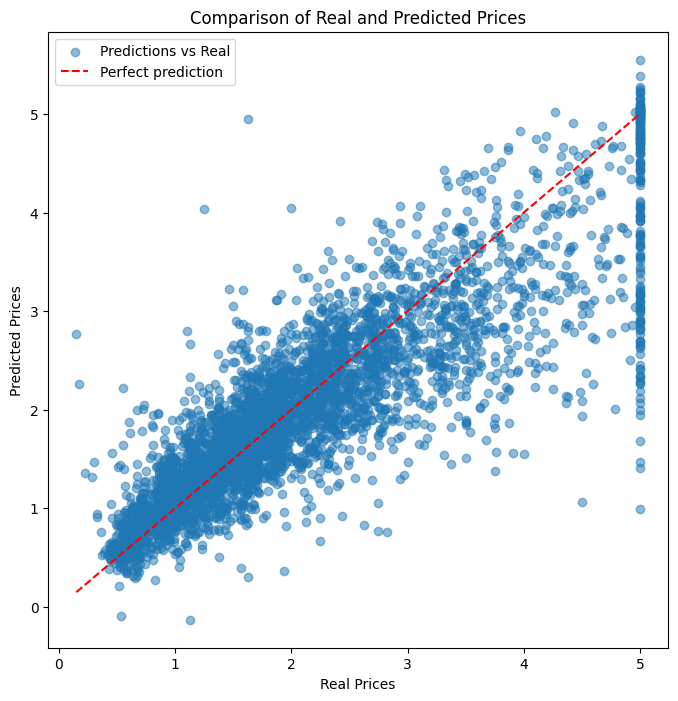

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred, alpha=0.5, label="Predictions vs Real")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--", label="Perfect prediction")
plt.xlabel("Real Prices")
plt.ylabel("Predicted Prices")
plt.title("Comparison of Real and Predicted Prices")
plt.legend()
plt.show()

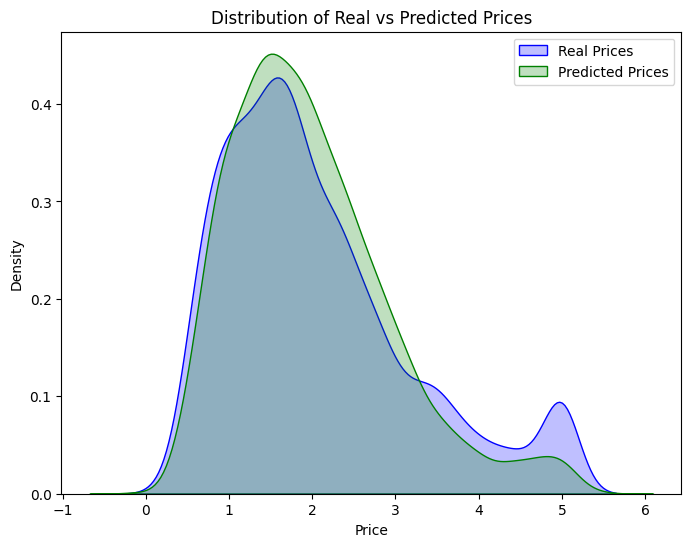

In [16]:
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.kdeplot(y_test, color="blue", label="Real Prices", fill=True)
sns.kdeplot(y_pred, color="green", label="Predicted Prices", fill=True)
plt.title("Distribution of Real vs Predicted Prices")
plt.xlabel("Price")
plt.ylabel("Density")
plt.legend()
plt.show()
